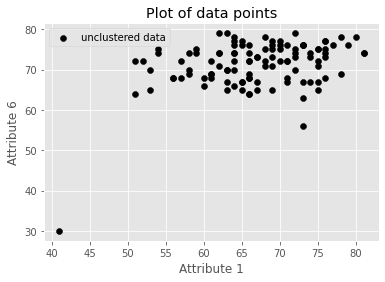

In [10]:
import pandas as pd
import numpy as np
import random as rd
from statistics import mean
import sys
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import style
import math
import csv

dataset=pd.read_csv('Datasets/SPECTF_test.csv')
X = dataset.iloc[:, 0:45].values
m  = X.shape[0]
n = X.shape[1]
arr = []
target = []
Centroids=np.array([]).reshape(n,0)
n_iter = m
K = 2
for i in range(m):
    value = X[i][44]
    target.append(value+1)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
Output={}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2, axis=1)

       EuclidianDistance = np.c_[EuclidianDistance,tempDist]

C=np.argmin(EuclidianDistance,axis=1)+1
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(45,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T

for k in range(K):
    Centroids[:,k]=np.mean(Y[k+1],axis=0)
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2, axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(45,0)

      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y
plt.scatter(X[:,1],X[:,6],c='black',label='unclustered data')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 6')
plt.legend()
plt.title('Plot of data points')
plt.show()

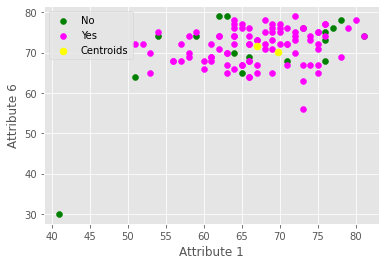

In [11]:
color=['green','magenta']
labels=[  'No', 'Yes']
for k in range(K):
    plt.scatter(Output[k+1][:,1],Output[k+1][:,6],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[6,:],s=50,c='yellow',label='Centroids')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 6')
plt.legend()
plt.show()

In [12]:
def main():
    no_of_records = len(Output[1])
    no_of_iter = 100
    no_of_attr = len(Output[1])-1
    k = 2    
    for i in Output[1]:
        i[44] = 1
        arr.append(i)
    for i in Output[2]:
        i[44] = 2
        arr.append(i)
main()

In [13]:
style.use('ggplot')
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
predicted_dict={}
points = []
Output[1] = Output[1].astype(int)
Output[2] = Output[2].astype(int)
for datapoints in Output[1]:
    data_str=str(datapoints)
    points.append(data_str)
    predicted_dict[data_str]=1
for datapoints in Output[2]:
    data_str=str(datapoints)
    points.append(data_str)
    predicted_dict[data_str]=2
predicted= np.array([])

Confusion matrix:
[[ 2 53]
 [15 40]]

True Positive: 2

True Negative: 40

False Positive: 15

False Negative: 53

Accuracy: 38.18181818181819

Precision: 0.11764705882352941

Recall: 0.03636363636363636

F1 Score: 0.055555555555555566
Confusion matrix, without normalization


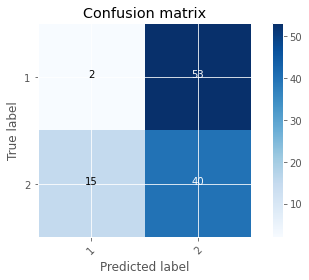

In [15]:
for i in range(len(points)):
    predicted = np.append(predicted, predicted_dict[str(points[i])])
class_names=[1, 2]
C1 = []
for i in range(m):
    value = arr[i][44]
    C1.append(int(value))
ret_array=confusion_matrix(target, C1, labels=class_names)
print('Confusion matrix:')
print(ret_array)
trueP = ret_array[0][0]
falseN = ret_array[0][1]
falseP = ret_array[1][0]
trueN = ret_array[1][1]
print('\nTrue Positive:',trueP)
print('\nTrue Negative:',trueN)
print('\nFalse Positive:',falseP)
print('\nFalse Negative:',falseN)
accuracy = (trueP+trueN)/m
precision = (trueP)/(trueP+falseP)
recall = trueP/(trueP +falseN)
f1 = (2*precision*recall)/(precision+recall)
print('\nAccuracy:',accuracy*100)
print('\nPrecision:',precision)
print('\nRecall:',recall)
print('\nF1 Score:',f1)
plot_confusion_matrix(ret_array, class_names,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)